In [1]:
import torch
from state_quantization.transforms import NormalizeTransform
from envs.IBGym_mod_envs import IBGymModded, IBGymQ
import numpy as np
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
from q_learning.algorithm import QLearning
from envs.env_creator import env_creator
from q_learning.algorithm import QLPolicy

In [2]:
plt.rcParams["figure.figsize"] = [20,12]

## Init Model and env

In [3]:
device = 'cpu'
policy_path = 'q_learning/q_policy.pkl'
steps_per_episode = 1000
env_kwargs = {'steps_per_episode': steps_per_episode,'device':device, 'config':None}

In [4]:
algo = QLearning()

In [5]:
alpha = np.logspace(np.log(0.9), np.log(0.05), 1000, base=np.exp(1))
gamma = 0.995
#epsilon = 0.05
total_epochs = 2000
exp_decay = 0.001
epsilon = np.logspace(np.log(1), np.log(0.01), 1000, base=np.exp(1))

## Train policy

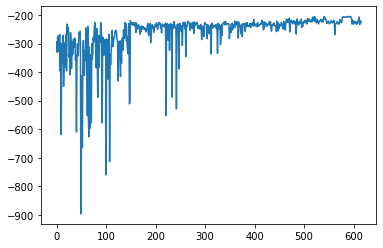

Episode 615 Reward: -225.59591231660994
Total States: 1217


In [ ]:
import time

start = time.time()
algo.train(epochs=total_epochs,alpha=alpha,gamma=gamma,epsilon=epsilon,env_creator=env_creator, env_kwargs=env_kwargs,reward_offset=2000, graph=True)
end = time.time()
print(end-start)

## Save Policy

In [ ]:
algo.policy.q_table

In [ ]:
algo.policy.save(policy_path)
del algo

## Load Policy

In [ ]:


policy = QLPolicy.load(policy_path)
algo = QLearning(policy=policy)

## Evaluate policy

In [ ]:
algo.evaluate(epochs=10,env_creator=env_creator,env_kwargs=env_kwargs)

In [ ]:
np.mean(algo.eval_rewards_per_epoch)

In [ ]:
np.std(algo.eval_rewards_per_epoch)

In [ ]:
for ep in algo.eval_trajectories:
    plt.plot(ep['obs'])
    print(np.unique(ep['obs']).size)
    plt.show()

In [ ]:
for ep in algo.eval_trajectories:
    plt.plot(ep['actions'])
    print(np.unique(ep['actions']).size)
    plt.show()